#Importando Base de Dados de pasta do Google Drive

- Importando pasta .zip do Google Drive

In [201]:
#from urllib import request
#file_url = 'https://drive.google.com/uc?export=download&id=1AelhQ2K5huQCikt2TRwhraR4r3ZwTsk9'
#file = 'data_fft.zip'
#request.urlretrieve(file_url , file )

- Descompactando a pasta

In [202]:
#!unzip data_fft.zip

- Apagando o arquivo .zip

In [203]:
#!rm -rf data_fft.zip

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#IMPORTANTO DOS DADOS (Escadas)

Importação das planilhas com dados de Movimento pelo Tempo de experimentos realizados atráves do aplicativo phyphox utilizando o sensor Giroscópio.

In [205]:
# Carregar os dados do giroscópio de uma tabela xls de movimentos subindo e descendo escadas simulando tremedeira nas mãos
dt_escadas = pd.read_excel('/content/data_fft/Escadas.xls')
resultados_abs_dt_escadas =  dt_escadas['Absolute (rad/s)']
tempo_dt_escadas = dt_escadas['Time (s)']

# Para idendificar melhor o sinal na FFT, coloquei numa oscilação de 0.1s
dx = 0.1 #segundos

#PLOTAGEM DA SÉRIE TEMPORAL

Plotagem da série temporal das colunas de Tempo x Resultado Absoluto (valores absolutos dos eixos x, y e z) que indicam um movimento de subir e descer escadas, num periodo de 30 segundos, simulando com as mãos (por periodos de 5 segundos) tremores involuntários.

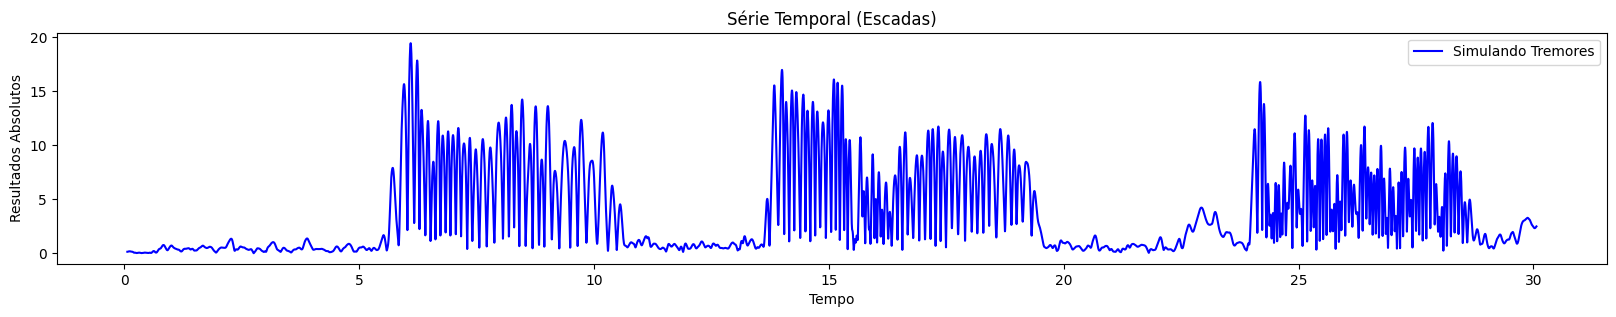

In [206]:
# Plot da série temporal da tabela de dados
plt.figure(figsize=(20, 3))

plt.plot(tempo_dt_escadas, resultados_abs_dt_escadas, label='Simulando Tremores', color='blue')
plt.xlabel('Tempo')
plt.ylabel('Resultados Absolutos')
plt.title('Série Temporal (Escadas)')
plt.legend()

#TRANSFORMADA DE FOURIER

Transformação dos dados, saindo do universo do tempo e entrando no universo das frequências.

Perceba que o pico (semelhante, mas não a mesma coisa, ao Delta de Dirac) tem altura finita pois estamos calculando a T. de Fourier num intervalo finito do tempo.

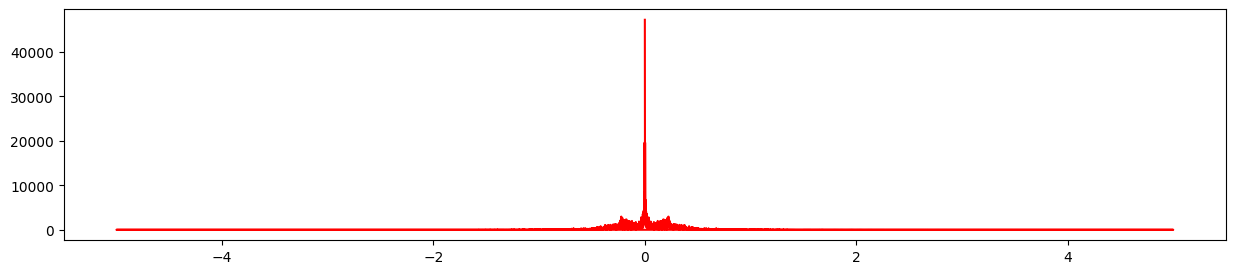

In [207]:
# Transformada de Fourier (FFT)
F = np.fft.fft(resultados_abs_dt_escadas)
freq = np.fft.fftfreq(np.size(F), d=dx)

plt.figure(figsize=(15, 3))
plt.plot(freq, np.abs(F),'r')

#DETECTANDO O PICO

Traçando uma linha preta em cima do pico detectado para destacá-lo.


---


#EXPLICAÇÃO DO SINAL DETECTADO

Na Transformada Rápida de Fourier (FFT) quando se encontra um pico na frequência zero (0 Hz), isso geralmente significa que a componente DC (componente de frequência zero) é dominante no seu sinal original. Em outras palavras, o valor médio do seu sinal no domínio do tempo é significativo.

A componente DC representa a média do sinal original e indica quanto o sinal está deslocado verticalmente em relação a zero. Se o pico da FFT está em 0 Hz, significa que a maior parte da energia do sinal está concentrada na média ou no valor médio do sinal, o que é útil para identificar deslocamentos de corrente contínua (DC) ou tendências no sinal.

Em geral, um pico na frequência zero indica uma componente de frequência zero, que é a média ou offset do sinal. Essa informação pode ser importante em várias aplicações de análise de séries temporais financeiras e outros tipos de sinal.

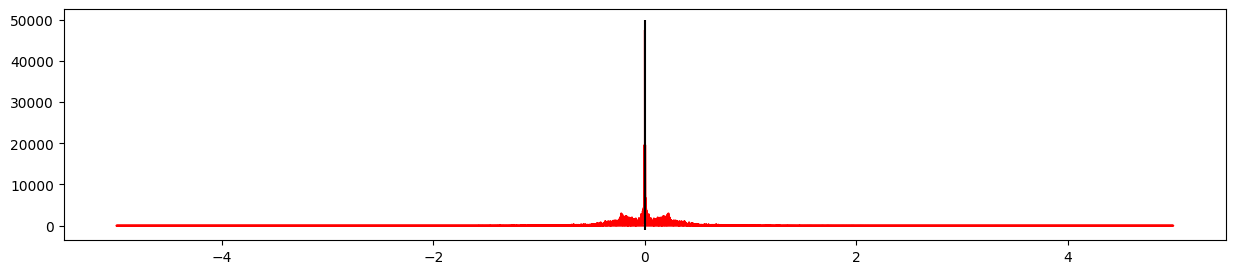

In [208]:
plt.figure(figsize=(15, 3))
plt.plot(freq, np.abs(F),'r')

# Traçando uma linha preta no pico detectado
plt.vlines(0, -1000, 50000, 'k')

#TRANSFORMADA DE FOURIER INVERSA

Fazendo a Transformada de Fourier Inversa para validar se até o presente momento tudo está funcionando como deveria

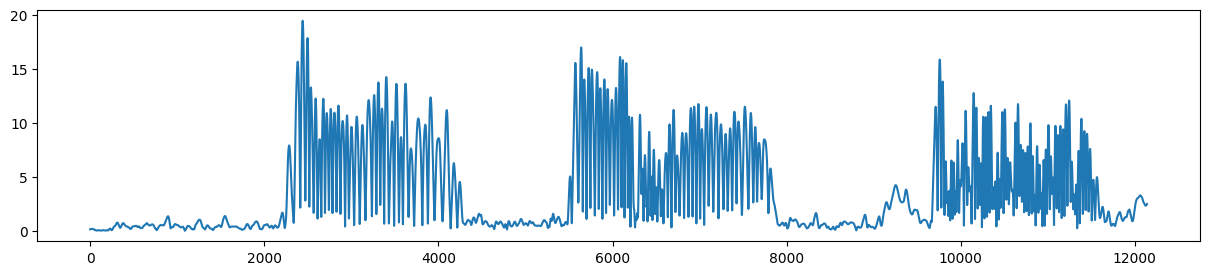

In [209]:
# Transformada de Fourier Inversa (IFFT)
fi = np.real(np.fft.ifft(F))
plt.figure(figsize=(15, 3))
plt.plot(fi)

#APLICANDO UM FILTRO PASSA ALTA NA FFT

Foi utilizado um Filtro Passa Alta para apagar a vizualização do pico da FFT e assim, ao fazer a Transformada de Fourier Inversa, conseguir vizualizar a Série Temporal sem as frequências resultantes da simulação de tremores.

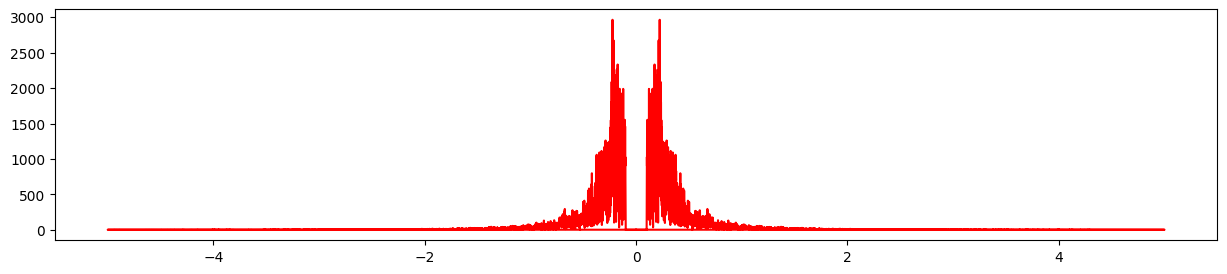

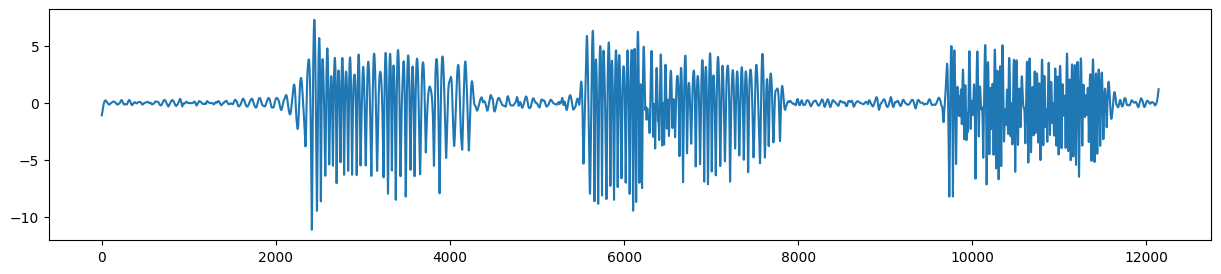

In [210]:
#Filtro Passa Alta
F11 = np.copy(F)
F11[np.abs(freq) < 0.1] = 0
plt.figure(figsize=(15, 3))
plt.plot(freq, np.abs(F11),'r')

fi = np.real(np.fft.ifft(F11))
plt.figure(figsize=(15, 3))
plt.plot(fi)

#APLICANDO UM FILTRO PASSA BAIXA NA FFT

Foi utilizado um Filtro Passa Baixa para deixar a vizualização apenas do pico da FFT e assim, ao fazer a Transformada de Fourier Inversa, conseguir vizualizar a Série Temporal somente com as frequências resultantes da simulação de tremores.

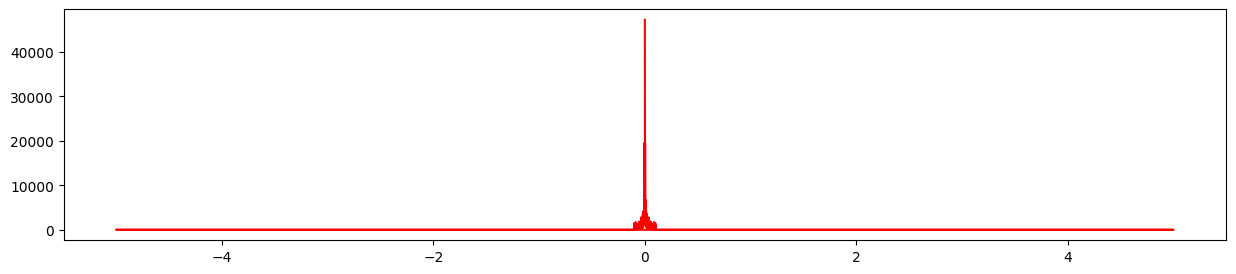

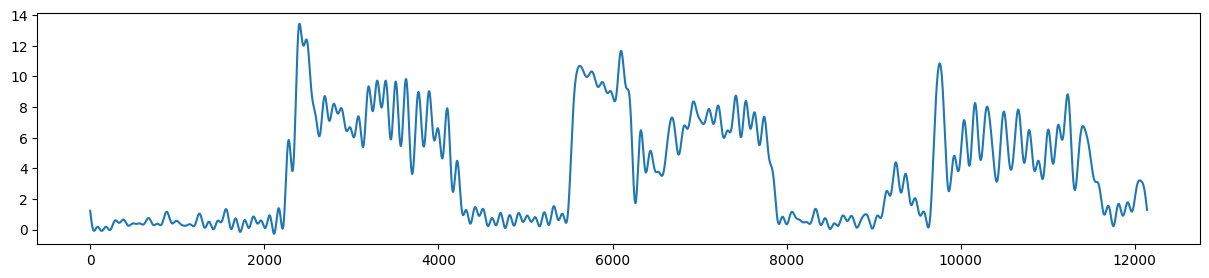

In [211]:
# Filtro Passa Baixa
F12 = np.copy(F)
F12[np.abs(freq) > 0.1] = 0
plt.figure(figsize=(15, 3))
plt.plot(freq, np.abs(F12),'r')

fi = np.real(np.fft.ifft(F12))
plt.figure(figsize=(15, 3))
plt.plot(fi)